In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pickle
import pathlib
import sys
from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")
sys.path.append(join(dir_path, "HelperFiles"))
import helper

def get_fwers_all_pts(all_top_Ks):
    return np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in all_top_Ks])



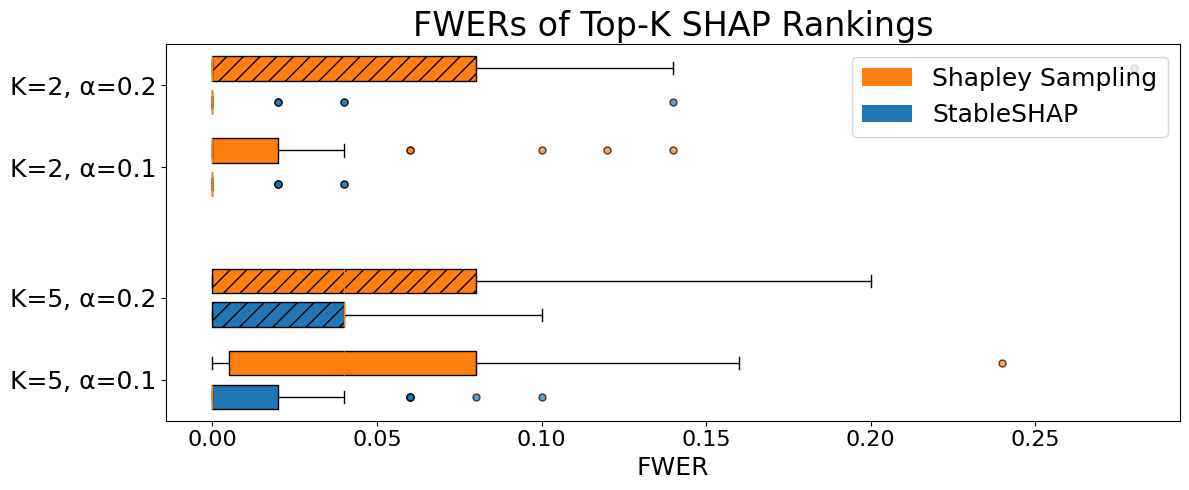

In [2]:
# Load and prepare data for alpha = 0.1
alpha = 0.1
results_path = join(dir_path, "Experiments", "Results", "Top_K", "rank", "alpha_"+str(alpha))
with open(join(results_path, "stableshap_vs_ss_k2"), "rb") as fp:
    results2_alpha01 = pickle.load(fp)
with open(join(results_path, "stableshap_vs_ss_k5"), "rb") as fp:
    results5_alpha01 = pickle.load(fp)
stableshap_fwers2_alpha01 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results2_alpha01['rankshap']])
ss_adaptive_fwers2_alpha01 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results2_alpha01['ss_adaptive']])
stableshap_fwers5_alpha01 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results5_alpha01['rankshap']])
ss_adaptive_fwers5_alpha01 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results5_alpha01['ss_adaptive']])

# Load and prepare data for alpha = 0.2
alpha = 0.2
results_path = join(dir_path, "Experiments", "Results", "Top_K", "rank", "alpha_"+str(alpha))
with open(join(results_path, "stableshap_vs_ss_k2"), "rb") as fp:
    results2_alpha02 = pickle.load(fp)
with open(join(results_path, "stableshap_vs_ss_k5"), "rb") as fp:
    results5_alpha02 = pickle.load(fp)
stableshap_fwers2_alpha02 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results2_alpha02['rankshap']])
ss_adaptive_fwers2_alpha02 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results2_alpha02['ss_adaptive']])
stableshap_fwers5_alpha02 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results5_alpha02['rankshap']])
ss_adaptive_fwers5_alpha02 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results5_alpha02['ss_adaptive']])

# Prepare the data dictionary
data = {
    "StableSHAP (K=5, α=0.1)": stableshap_fwers5_alpha01,
    "SS Adaptive (K=5, α=0.1)": ss_adaptive_fwers5_alpha01,
    "StableSHAP (K=5, α=0.2)": stableshap_fwers5_alpha02,
    "SS Adaptive (K=5, α=0.2)": ss_adaptive_fwers5_alpha02,
    "StableSHAP (K=2, α=0.1)": stableshap_fwers2_alpha01,
    "SS Adaptive (K=2, α=0.1)": ss_adaptive_fwers2_alpha01,
    "StableSHAP (K=2, α=0.2)": stableshap_fwers2_alpha02,
    "SS Adaptive (K=2, α=0.2)": ss_adaptive_fwers2_alpha02
}

fig, ax = plt.subplots(figsize=(12, 5))

# Define positions for boxplots
btwn_alphas = 1
btwn_Ks = 2
btwn_same = 0.7
start = 1
mid = start + btwn_alphas + btwn_same*2 + btwn_Ks
positions = [
    start, start + btwn_same,
    start + btwn_alphas + btwn_same,
    start + btwn_alphas + btwn_same*2,
    mid, mid + btwn_same,
    mid + btwn_alphas + btwn_same,
    mid + btwn_alphas + btwn_same*2,
]

# Create the boxplot
box = ax.boxplot(
    list(data.values()),
    positions=positions,
    widths=0.5,
    patch_artist=True,
    vert=False,
    showfliers=True
)

# Define colors and hatches for each box
colors = ['#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e',
          '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e']
hatches = [None, None, '//', '//', None, None, '//', '//']

# Apply colors and hatches to the boxes
for patch, color, hatch in zip(box['boxes'], colors, hatches):
    patch.set_facecolor(color)
    patch.set_hatch(hatch)

# Color the fliers to match the boxes
for flier, color in zip(box['fliers'], colors):
    # For horizontal boxplots, fliers are PathCollection objects
    flier.set(marker='o', markerfacecolor=color, markeredgecolor='black', markersize=5, alpha=0.7)

# Set titles and labels
ax.set_title('FWERs of Top-K SHAP Rankings', fontsize=24)
ax.set_xlabel('FWER', fontsize=18)

# Set y-ticks to group StableSHAP and SS Adaptive together
ax.set_yticks([np.mean([positions[i], positions[i+1]]) for i in range(0, len(positions), 2)])
ax.set_yticklabels(['K=5, α=0.1', 'K=5, α=0.2', 'K=2, α=0.1', 'K=2, α=0.2'], fontsize=18)

# Update legend to include method colors and alpha distinctions
legend_elements = [
    Patch(facecolor='#ff7f0e', label='Shapley Sampling'),
    Patch(facecolor='#1f77b4', label='StableSHAP')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=18)

# Adjust tick parameters
ax.tick_params(axis='x', labelsize=16)

# Final layout adjustments and save/show the plot
plt.tight_layout()
plt.savefig(
    join(dir_path, "Experiments", "Figures", "stableshap_vs_ss.pdf"),
    bbox_inches="tight",
    format="pdf",
    dpi=300
)
plt.show()